# MÓDULO 6. ESTADÍSTICA
## Ejercicio de Evaluación. Descriptiva e Inferencia.

<span style="color:red">Ejercicio 1.  La siguiente tabla contiene, en un editable Excel, dos variables: la primera es dicotómica con valores 1 (predinástico temprano) y 2 (predinástico tardío) y la segunda contiene la anchura de cráneos (mm.) encontrados en un yacimiento arqueológico. La idea es analizar si existen diferencias en la longitud de la anchura de los cráneos egipcios a medida que pasa el tiempo. Creo que mayoritariamente tenemos una idea de que las cabezas egipcias son más alargadas y cuando ya llegamos a los romanos son más redondeadas. El cine se ha encargado de hacer muy gráfico todo esto</span>



<span style="color:red">a)	obtener con Python las diferentes medidas de centralización y dispersión, asimetría y curtosis estudiadas. Así mismo, obtener el diagrama de caja y bigotes. Se debe hacer por separado para la sub-muestra de los cráneos del predinástico temprano y para la sub-muestra de los del predinástico tardío. Comentar los resultados obtenidos. Estos comentarios son obligatorios<span>

In [1]:
import os
import pandas  as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import math as mt
from scipy.stats import pearsonr

sns.set_style('darkgrid')
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel('datosejercicioevaluacionanchuras.xlsx')

In [3]:
# Muestra de PREDINÁSTICO TEMPRANO
df_1 = df[df['Época histórica']==1]

In [4]:
#muestra de PREDINÁSTICO TARDÍO
df_2 = df[df['Época histórica']==2]

**MEDIDAS DE TENDENCIA CENTRAL - NO CENTRAL - DISPERSION - FORMA - PREDINASTICO TEMPRANO**

In [5]:
valores_1 = pd.DataFrame(df_1['Anchura del cráneo'].describe())
valores_1.reset_index(inplace=True)
valores_1.rename(columns={'index':'Medida'},inplace = True)

In [6]:
valores_1.head(5)
# Algunas de las medidas de tendencia central (calcularemos las faltantes)

,Medida,Anchura del cráneo
0,count,30.000000
1,mean,131.533333
2,std,0.819307
3,min,130.000000
4,25%,131.000000


In [7]:
# Cálculo de la moda para grupo 1 (predinástico temprano)
moda = df_1['Anchura del cráneo'].mode().iloc[0]

In [8]:
# Cálculo del rango (valor maximo - valor mínimo)
rango = df_1['Anchura del cráneo'].max() - df_1['Anchura del cráneo'].min()

In [9]:
# Cálculo de la varianza
varianza = df_1['Anchura del cráneo'].var()

In [10]:
# Cálculo del coeficiente de variación de Pearson (DESVIACION STANDAR / MEDIA)
coef_var_P = valores_1.loc[2][1]/valores_1.loc[1][1]

In [11]:
df_1['Xi - Media'] = df_1['Anchura del cráneo'] - valores_1.loc[1][1]
df_1['(Xi - Media)*3'] = df_1['Xi - Media']**3
df_1['(Xi - Media)*4'] = df_1['Xi - Media']**4
# Generación de columnas de apoyo para el cálculo de asimetría y curtosis

In [12]:
df_1.head(5)
# Tabla de los cráneos del periodo temprano (con columnas de apoyo para el cálculo de la forma de la distribución)

,Época histórica,Anchura del cráneo,Unnamed: 2,Unnamed: 3,Unnamed: 4,Xi - Media,(Xi - Media)*3,(Xi - Media)*4
0,1,133,NaN,NaN,NaN,1.466667,3.154963,4.627279
1,1,131,NaN,NaN,NaN,-0.533333,-0.151704,0.080909
2,1,131,NaN,NaN,133.0,-0.533333,-0.151704,0.080909
3,1,132,NaN,NaN,NaN,0.466667,0.101630,0.047427
4,1,134,NaN,NaN,NaN,2.466667,15.008296,37.020464


In [13]:
Coef_Fisher=df_1['(Xi - Media)*3'].sum()/((df_1['Época histórica'].count()-1)*mt.pow(valores_1.loc[2][1],3))
Coef_Fisher

0.6459405126888941

<span style="color:blue">Al obtener un **coeficiente de Fisher positivo**, podemos afirmar que existe una mayor concentración de valores a la derecha del eje de simetría

In [14]:
coeficiente_Curtosis = df_1['(Xi - Media)*4'].sum()/((df_1['Época histórica'].count()-1)*mt.pow(valores_1.loc[2][1],4)) -3
coeficiente_Curtosis

1.1608932257459212

<span style="color:blue">El coeficiente de curtosis es mayor que 0, por lo que podemos anticipar una **distribución leptocúritca**, es decir, 
la distribución presenta un elevado grado de concentración alrededor de los valores centrales de la variable

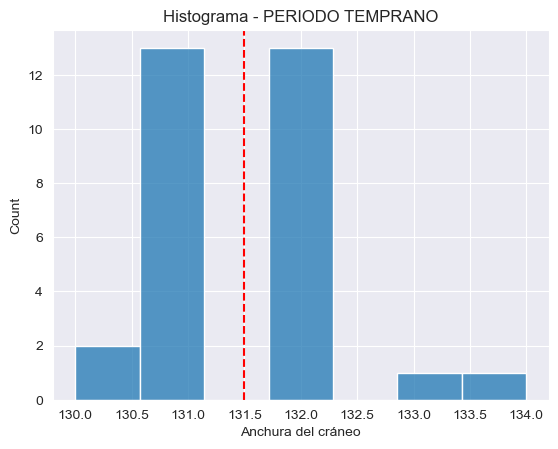

In [15]:
sns.histplot(data=df_1['Anchura del cráneo'] )
plt.axvline(x=valores_1.loc[5][1], color='red', linestyle='--')
plt.title('Histograma - PERIODO TEMPRANO')
plt.show()

<span style="color:blue">Se ha colocado el histograma y una línea roja constante en la mediana para observar el comportmiento-forma de la distribución.
Evidentenmemente visualizamos mayor concentración por encima de la mediana (131.5) y una concentración de valroes alrededor de ésta.<span>

    
<span style="color:blue">--> A raíz de los coeficientes de FISHER Y CURTOSIS obtenidos podemos determinar que:
    
<span style="color:blue">La distribución posee mayor concentración de valores a la derecha de la mediana, ya que el coeficinete de Fisher (0.64594) es superior a 0 y se trata de una distribucion leptocúritca con valores muy concnetrados alrededor de la mediana (principalmente en los valores 131.0 y 132), ya que el coeficiente de curtosis (1.16089) es mayor que 0.<span>

In [16]:
Medida = ['moda','rango','varianza','CoeficientePerson','CoeficienteFisher','CoeficienteCurtosis']
Anchura_del_Craneo = [moda,rango, varianza,coef_var_P,Coef_Fisher,coeficiente_Curtosis]

medidas_2 = pd.DataFrame({'Medida':Medida,'Anchura del cráneo':Anchura_del_Craneo})
medidas_2

,Medida,Anchura del cráneo
0,moda,131.000000
1,rango,4.000000
2,varianza,0.671264
3,CoeficientePerson,0.006229
4,CoeficienteFisher,0.645941
5,CoeficienteCurtosis,1.160893


**MEDIDAS PERIODO TEMPRANO**

In [17]:
# Se unen los dos dataframes con las medidas correspondientes para mostrarlos en uno solo
valores_w = pd.concat([valores_1,medidas_2],ignore_index=True)
valores_w

# Con  esto la siguiente tabla muestra la totalidad de elementos correspondintes a medidas de 
#tendencia central, no central, forma y variabiliad 

,Medida,Anchura del cráneo
0,count,30.000000
1,mean,131.533333
2,std,0.819307
3,min,130.000000
4,25%,131.000000
5,50%,131.500000
6,75%,132.000000
7,max,134.000000
8,moda,131.000000
9,rango,4.000000


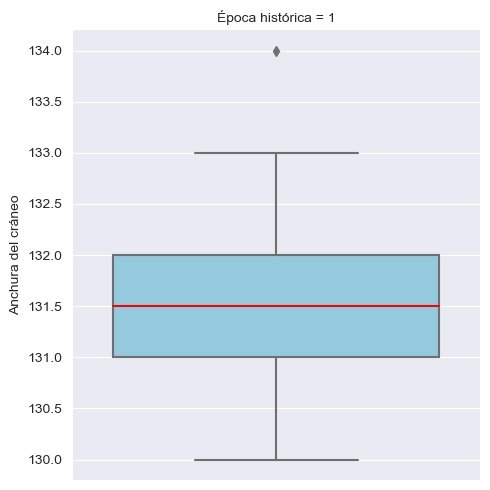

In [18]:
sns.catplot(data = df_1 ,  y='Anchura del cráneo' , col ='Época histórica' , kind = 'box', color='skyblue',medianprops={'color':'red'} )
plt.show()

<span style="color:blue">Como vemos en el diagrama de caja para el periodo temprano, no se presentan datos atipicos. Se pueden observar los valores máximo (133) y mínimo (130), los cuartiles (131 y 132) y la mediana (131.5), que está en total armonía con los cuartiles. También cabe destacar el valor 134, muy alejado de la media.<span>

**MEDIDAS DE TENDENCIA CENTRAL - NO CENTRAL - DISPERSION - FORMA - PREDINASTICO TARDIO**




In [19]:
# Obtención de algunos de las medidas de tendencia central y no central. Calcularemos el resto a continuación
valores_2 = pd.DataFrame(df_2['Anchura del cráneo'].describe())
valores_2.reset_index(inplace=True)
valores_2.rename(columns={'index':'Medida'},inplace = True)

In [20]:
valores_2.head(5)

,Medida,Anchura del cráneo
0,count,30.000000
1,mean,132.466667
2,std,1.008014
3,min,131.000000
4,25%,132.000000


In [21]:
# Cálculo de la moda para grupo 2 (predinástico tardío)
moda_2  = int(df_2['Anchura del cráneo'].mode())

In [22]:
# Cálculo del rango (valor máximo - valor mínimo)
rango_2 = df_2['Anchura del cráneo'].max() - df_2['Anchura del cráneo'].min()

In [23]:
# Cálculo de la varianza
varianza_2 = df_2['Anchura del cráneo'].var()

In [24]:
# Cálculo del coeficiente de variacion de Pearson (DESVIACION STANDAR / MEDIA)
coef_var_P_2 = valores_2.loc[2][1]/valores_2.loc[1][1]

In [25]:
df_2['Xi - Media'] = df_2['Anchura del cráneo'] - valores_2.loc[1][1]
df_2['(Xi - Media)*3'] = df_2['Xi - Media']**3
df_2['(Xi - Media)*4'] = df_2['Xi - Media']**4
# Generación de columnas de apoyo para el cálculo de asimetría y curtosis

In [26]:
df_2.head(5)

,Época histórica,Anchura del cráneo,Unnamed: 2,Unnamed: 3,Unnamed: 4,Xi - Media,(Xi - Media)*3,(Xi - Media)*4
30,2,132,NaN,NaN,NaN,-0.466667,-0.101630,0.047427
31,2,133,NaN,NaN,NaN,0.533333,0.151704,0.080909
32,2,131,NaN,NaN,NaN,-1.466667,-3.154963,4.627279
33,2,133,NaN,NaN,NaN,0.533333,0.151704,0.080909
34,2,133,NaN,NaN,NaN,0.533333,0.151704,0.080909


In [27]:
Coef_Fisher_2=df_2['(Xi - Media)*3'].sum()/((df_2['Época histórica'].count()-1)*mt.pow(valores_2.loc[2][1],3))
Coef_Fisher_2

0.1918262295493577

<span style="color:blue">Al obtener un **coeficiente de Fisher positivo**, se puede afirmar que existe una mayor concentración de valores a la derecha del eje de simetría<span>

In [28]:
coeficiente_Curtosis_2 = df_2['(Xi - Media)*4'].sum()/((df_2['Época histórica'].count()-1)*mt.pow(valores_2.loc[2][1],4)) -3
coeficiente_Curtosis_2

-0.2800290739337874

<span style="color:blue">El coeficiente de curtosis es menor que 0 por lo que podemos anticipar una **distribución platicúrtica**<span>

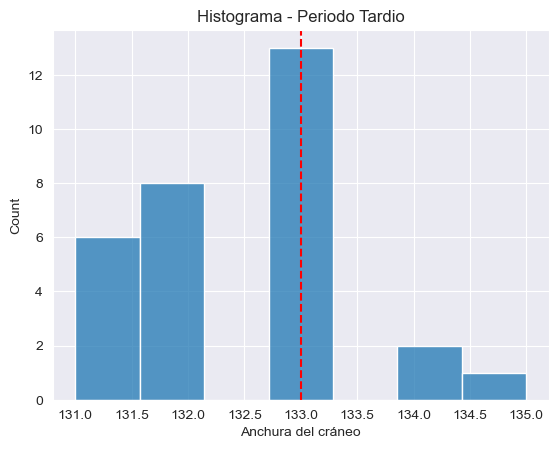

In [29]:
sns.histplot(data=df_2['Anchura del cráneo'] )
plt.axvline(x=valores_2.loc[5][1], color='red', linestyle='--')
plt.title('Histograma - Periodo Tardio')
plt.show()

<span style="color:blue">Se ha colocado el histograma y una línea roja constante en la mediana para observar el comportmiento-forma de la distribución.
La mediana coincide con la moda que es de 133. Además, al comparar las otras frecuencias, encontramos una mayor cantidad de valores a la izquierda indicando una asimetría negativa<span>

    
<span style="color:blue">--> A raíz de los coeficientes de FISHER Y CURTOSIS obtenidos podemos determinar que:
    
<span style="color:blue">La distribucion debería poseer mayor concentracion de valores a la derecha de la mediana (133), aunque en este caso no se cumple  (ya que el coeficinete de Fisher (0.19182) es superior a 0) y se trata de una distribución platicúrtica con valores menos concentrados en la media a comparación de la distribución normal y más distribuidos en las colas, ya que el coeficiente de curtosis (-0.28002) es menor que 0.<span>

In [30]:
Medida_2 = ['moda','rango','varianza','CoeficientePerson','CoeficienteFisher','CoeficienteCurtosis']
Anchura_del_Craneo_2 = [moda_2,rango_2, varianza_2,coef_var_P_2,Coef_Fisher_2,coeficiente_Curtosis_2]

medidas_2_2 = pd.DataFrame({'Medida':Medida_2,'Anchura del cráneo':Anchura_del_Craneo_2})
medidas_2_2

,Medida,Anchura del cráneo
0,moda,133.000000
1,rango,4.000000
2,varianza,1.016092
3,CoeficientePerson,0.007610
4,CoeficienteFisher,0.191826
5,CoeficienteCurtosis,-0.280029


**MEDIDAS PERIODO TRARDÍO**

In [31]:
# Se unen los dos dataframes con las medidas correspondientes para mostrarlos en uno solo
valores_w_2 = pd.concat([valores_2,medidas_2_2],ignore_index=True)
valores_w_2

# Con  esto la siguiente tabla muestra la totalidad de elementos correspondintes a medidas de 
#tendencia central, no central, forma y variabiliad 

,Medida,Anchura del cráneo
0,count,30.000000
1,mean,132.466667
2,std,1.008014
3,min,131.000000
4,25%,132.000000
5,50%,133.000000
6,75%,133.000000
7,max,135.000000
8,moda,133.000000
9,rango,4.000000


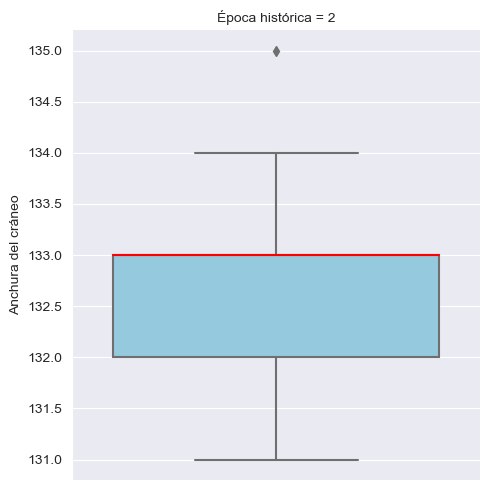

In [32]:
sns.catplot(data = df_2 ,  y='Anchura del cráneo' , col ='Época histórica' , kind = 'box', color='skyblue',medianprops={'color':'red'} )
plt.show()

<span style="color:blue">Se evidencia un valor atipíco en la muestra: el 135. Aademás, la mediana coincide con el cuartil 75% y con la moda, por lo que podemos afirmar que  hay una gran presencia del valor 133, y que los cuartiles 2 y 3 son muy desiguales. Al menos el 25% de las muestras tienen el valor de la mediana (133).<span>

**COMPARATIVA DE LOS DIAGRAMAS DE CAJA PARA AMBOS PERIODOS**

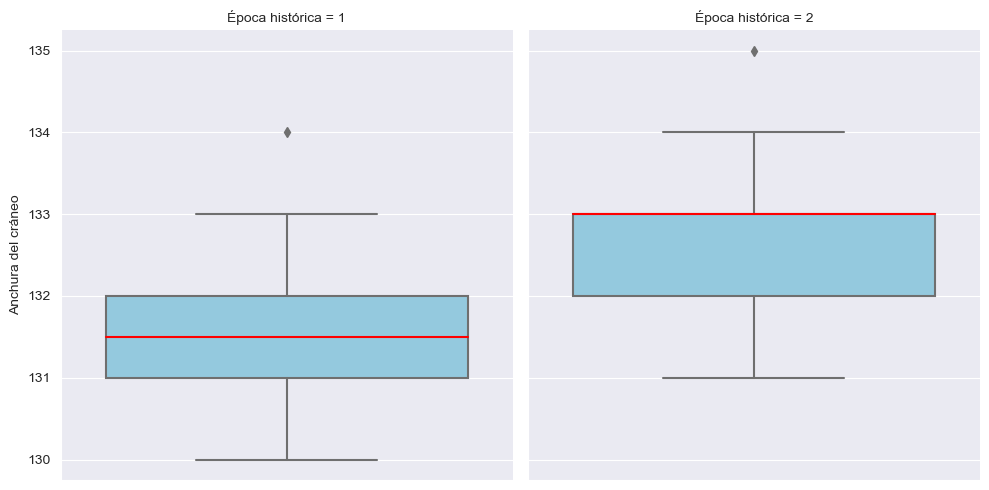

In [33]:
sns.catplot(data = df ,  y='Anchura del cráneo' , col ='Época histórica' , kind = 'box', color='skyblue',medianprops={'color':'red'} )
plt.show()

<font color="blue">
En vista de los resultados se puede afirmar que:

- La distribución 1 es **más simétrica** que la distribución 2
- Ambas distribuciones presentan **valores superiores atípicos**, aunque la distribución 2 (periodo tardío) es más asimétrica
- En términos generales, la distribución 2 se compone de valores superiores, ya que se encuentra **desplazada hacia arriba**

</font>


<span style="color:red">b) Determinar si cada una de las dos sub-muestras sigue una distribución normal utilizando el test de Kolmogorov-Smirnov.<span>

Ho -> la distribucion sigue una muestra normal

H1 -> La distribucion no sigue una muestra normal

In [34]:
from scipy import stats
import numpy as np
from sklearn.preprocessing import StandardScaler

# conversion de los df filtrado a np.array para aprovechar sus caracteristicas
submuestra1 = np.array(df_1['Anchura del cráneo'])
submuestra2 = np.array(df_2['Anchura del cráneo'])

# Asegurarse de que las submuestras sean arreglos de una sola columna
submuestra1 = submuestra1.reshape(-1, 1)
submuestra2 = submuestra2.reshape(-1, 1)

# Inicializar standarscaler de scktlearn
scaler1 = StandardScaler()
scaler2 = StandardScaler()

# Normalizar las muestras
submuestra1 = scaler1.fit_transform(submuestra1)
submuestra2 = scaler2.fit_transform(submuestra2)

#llevar las submuestras a matriz unidmensional
submuestra1=submuestra1.flatten()
submuestra2=submuestra2.flatten()

# Aplicar la prueba de Kolmogorov-Smirnov
statistic1, pvalue1 = stats.kstest(submuestra1, 'norm')
statistic2, pvalue2 = stats.kstest(submuestra2, 'norm')

# Imprimir los resultados
print("Resultados de la submuestra 1:")
print(f"Estadístico: {statistic1}, Valor p: {pvalue1}")
if pvalue1 > 0.05:
    print("La submuestra 1 sigue una distribución normal")
else:
    print("La submuestra 1 no sigue una distribución normal")

print("\nResultados de la submuestra 2:")
print(f"Estadístico: {statistic2}, Valor p: {pvalue2}")
if pvalue2 > 0.05:
    print("La submuestra 2 sigue una distribución normal")
else:
    print("La submuestra 2 no sigue una distribución normal")


Resultados de la submuestra 1:
Estadístico: 0.2460415331404474, Valor p: 0.04379464338101191
La submuestra 1 no sigue una distribución normal

Resultados de la submuestra 2:
Estadístico: 0.23809252465886277, Valor p: 0.05572704984817678
La submuestra 2 sigue una distribución normal


<font color="blue">

**COMENTARIOS DEL TEST KOLMOGROV-SMIRNOV**
    
MUESTRA 1:
- La muestra 1 posee un estadístico de 0.2460 y según la tabla para KM-SV, una muestra de 30 valores y un alfa = 0.05, el valor del estadístico es 0.24170, por lo que  Dcalculado > Dtabla con lo que se rechaza la hipótesis nula a un intervalo de confianza de 95%. 
- También podemos determinar que el p-valor es 0.0437, lo que indica que hay evidencia significativa para rechazar la hipótesis nula de que la submuestra sigue una distribución normal. 
- En resumen, la submuestra 1 no sigue una distribución normal.

MUESTRA 2:
- La muestra 2 posee un estadístico de 0.2380 y según la tabla para KM-SV, una muestra de 30 valores y un alfa = 0.05, el valor del estadístico es 0.24170, por lo que  Dcalculado < Dtabla con lo que se acepta la hipótesis nula. A un intervalo de confianza de 95% no existe suficiente evidencia en contra para rechazar la Ho
- También podemos determinar que el p-valor es 0.0557. Esto sugiere que no hay suficiente evidencia para rechazar la hipótesis nula de que la submuestra sigue una distribución normal a un nivel de significancia del 5%. 
- Por lo tanto, se podría asumir que la submuestra 2 sigue una distribución normal.

</font>



<font color="red">
Ejercicio 2.
    </font>

<font color="red">
a) Con los mismos datos del ejercicio anterior, obtener un intervalo de confianza (de nivel 0.9, de nivel 0.95 y de nivel 0.99) para la diferencia entre las medias de la anchura de la cabeza en ambos periodos históricos. Interpretar los resultados obtenidos y discutirlos en función del test de normalidad del ejercicio anterior. La interpretación debe ser rigurosa desde el punto de vista estadístico y también marcada por el story telling, es decir, comprensible desde el punto de vista de las variables respondiendo a la pregunta ¿en qué época la cabeza era más ancha?

</font>

Se aborda el intervalo de confianza para con los 3 niveles de confianza. 

Se requiere:
1. Saber si las muestras son independientes (sin embargo el ejercicio nos comenta que asumamos esta condición).
2. Sabemos que las varianzas poblacionales son desconocidas.
3. Demostrar si las varianzas de las poblaciones son iguales o diferentes.


COMPROBACIÓN DE VARIANZAS POBLACIONALES:

- H0: Las muestras poseen varianzas poblacionales iguales        S1 = S2 

- H1: Las muestras poseen varianzas poblaciionales diferentes    S1 != S2

Para probar si las varianzas poblacionales son iguales o diferences, tomaremos un intervalo de confianza del 90%. Cabe mencionar que esta prueba es de dos colas ya que estamos probando igualdad o diferencia. Dado que las muestras tienen 30 valores, los grados de libertad para ambos son 29 y alfa = 10%, pero al ser una preuba de dos colas tomaremos alfa/2 para obtener los valores criticos de F. siendo alfa = 5%

In [35]:
from scipy.stats import f

gl1= valores_1.loc[0][1] - 1  #cantidad de elementos de la muestra1 - 1
gl2= valores_2.loc[0][1] - 1  #cantidad de elementos de  la muestra 2 -1
alfa_medios = 0.05

In [36]:
valor_tabla_f_derecha = f.ppf(1-alfa_medios,gl1,gl2)   # Valor crítico por la derecha de la curva F

In [37]:
valor_tabla_f_izquierda = 1/valor_tabla_f_derecha     # Al tener el mismo número de GL la inversa es el valor de la izquierda

In [38]:
print("la zona de aprobacion de la H0 es:",valor_tabla_f_izquierda,"<F<",valor_tabla_f_derecha)

la zona de aprobacion de la H0 es: 0.5373999648406917 <F< 1.8608114354760754


In [39]:
# Se calcula el estadístico de F que es las división de las desviaciones estándar de las muestras al cuadrado
Fisher = mt.pow (valores_1.loc[2][1],2)/mt.pow(valores_2.loc[2][1],2)
Fisher

0.6606334841628961

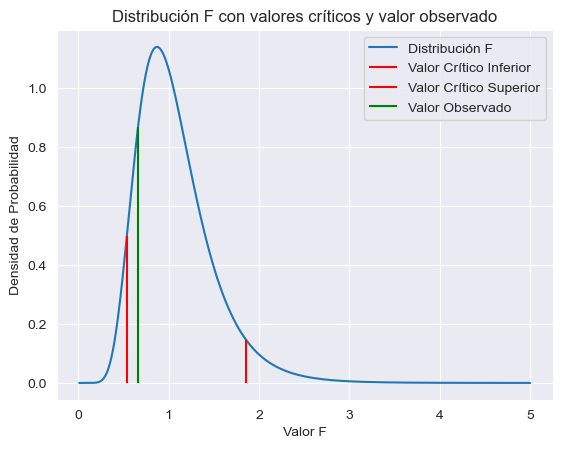

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import f

# Definir el rango de valores de F
f_values = np.linspace(0.01, 5, 1000)

# Calcular la distribución F
f_distribucion = f.pdf(f_values, gl1, gl2)

# Graficar la distribución F
plt.plot(f_values, f_distribucion, label='Distribución F')

# Graficar los valores críticos y el valor observado
plt.vlines(valor_tabla_f_izquierda, 0, f.pdf(valor_tabla_f_izquierda, gl1, gl2), colors='r', label='Valor Crítico Inferior')
plt.vlines(valor_tabla_f_derecha, 0, f.pdf(valor_tabla_f_derecha, gl1, gl2), colors='r', label='Valor Crítico Superior')
plt.vlines(Fisher, 0, f.pdf(Fisher, gl1, gl2), colors='g', label='Valor Observado')

# Configurar la leyenda y etiquetas
plt.legend()
plt.xlabel('Valor F')
plt.ylabel('Densidad de Probabilidad')
plt.title('Distribución F con valores críticos y valor observado')

# Mostrar la gráfica
plt.show()


<font color="blue">
Observando la gráfica obtenida se puede afirmar que estando el valor F dentro del intervalo de aceptación, que es 0.5373 - 1.8308, con un nivel de significacia del 90%, no existe evidencia suficiente para rechazar la H0
    </font>

Ahora, sabiendo que las muestras son independientes, las varianzas desconocias y además éstas son iguales, podemos calcular de lleno el intervalo de confianza para la diferencia de medias

In [41]:
from scipy.stats import t

diferencia_medias = valores_1.loc[1][1] - valores_2.loc[1][1]
n1=valores_1.loc[0][1]
n2=valores_2.loc[0][1]
s1 = valores_1.loc[2][1]
s2 = valores_2.loc[2][1]
grados_libertad = n1+n2-2
error_standar  = mt.sqrt((((n1*mt.pow(s1,2)+n2*mt.pow(s2,2))*((1/n1)+(1/n2)))/(grados_libertad)))
#el error standar para la diferencia de medias, es el determinado ya que las varianzas poblacionales 
#son desconocidas pero iguales

intervalo_90 = stats.t.interval(0.90,grados_libertad,loc=diferencia_medias,scale=error_standar)
intervalo_95 = stats.t.interval(0.95,grados_libertad,loc=diferencia_medias,scale=error_standar)
intervalo_99 = stats.t.interval(0.99,grados_libertad,loc=diferencia_medias,scale=error_standar)

In [42]:
print("los intervalos de confianza para la diferencia de medias con un 90% de confianza es:" ,intervalo_90)
print("-"*120)
print("los intervalos de confianza para la diferencia de medias con un 95% de confianza es:" ,intervalo_95)
print("-"*120)
print("los intervalos de confianza para la diferencia de medias con un 99% de confianza es:" ,intervalo_99)

los intervalos de confianza para la diferencia de medias con un 90% de confianza es: (-1.3365370178425788, -0.5301296488240955)
------------------------------------------------------------------------------------------------------------------------
los intervalos de confianza para la diferencia de medias con un 95% de confianza es: (-1.4161777177709258, -0.4504889488957485)
------------------------------------------------------------------------------------------------------------------------
los intervalos de confianza para la diferencia de medias con un 99% de confianza es: (-1.5757582313054241, -0.2909084353612502)


<font color="blue">Como el valor 0 no está incluido en ninguno de los 3 niveles de confianza determinados (90%, 95% y 99%) se puede afirmar que la diferencia entre las medias es estadísticamente considerable y no puede atribuirse a aleatoridad. En otras palabras, los cráneos de ambas poblaciones son condiderablemente distintos y el cráneo del periodo tardío es mas ancho que el cráneo del periodo temprano. La conclusión final que se puede esgrimir de estos resultados es que **el cráneo se ha ido ensanchando con el paso del tiempo**.
    </font>

<span style="color:red;">b) Utilizar el test t para contrastar la hipótesis de que ambas medias son iguales. Explicar qué condiciones se deben cumplir para poder aplicar ese contraste. Determinar si se cumplen. Admitiremos de forma natural la independencia entre ambas muestras, así que esa condición no hace falta comprobarla.</span>

<span style="color:red;">Observación: Quiero insistir en que debéis hacer el test t para la diferencia de medias incluso si las condiciones no se cumplieran. En ese caso, discutir la validez de los resultados obtenidos.</span>



Para poder probar la diferencia de medias de dos poblaciones debemos considerar que se deben cumplir 3 condiciones:
1. Normalidad de los datos (con la prueba de Kolmogrov-Smirnov se probó que las muestras siguen una distribución normal, aunque la de periodo temprano no cumple)
2. Homogenidad de la varianza (se demostró en el ejericio anterior que las varianzas son homogéneas con prueba F)
3. Independencia de las observaciones (el ejericio nos exige que esta condición ya se cumple)

Aplicamos las pruebas de hipótesis para diferencia de medias (aunque no se cumplan todas las condiciones, ya que el enunciado así lo requiere)
- H0: las medias de ambas muestras son iguales --------- M0 = M1     
- H1: Las medias de ambas muestras son diferentes ------ M0 != M1
    
Como tenemos una prueba de hipótesis de comprobar si las medias son iguales o distintas, esta corresponde a una prueba de dos colas. Además consideraremos un intervalo de confianza del 95%, por lo que el alfa sera 0.025 (a cada lado de la curva). También tenemos los grados de libertad correspondintes a N1+N2-2     

In [43]:
# Se calculan los valores críticos correspondeintes a la distribución T 

alfa = 0.05
alfa_medios = alfa/2

lim_sup = t.ppf(1-alfa_medios,grados_libertad)
lim_inf = t.ppf(alfa_medios,grados_libertad)

print("la zona de aceptacion para la prueba es :",lim_inf,",",lim_sup)

la zona de aceptacion para la prueba es : -2.0017174830120927 , 2.0017174830120923


**Cálculo del valor T**

- t = (Mmuestral1 - Mmuestral2) - (Mpobalcional1 - Mpoblacional2) / Error Standr Estimado

- Estamos probando en la Ho que las MediasPoblacionales son iguales, así que la diferencia de las Medias en la
fórmula anterior es 0 --> (Mpobalcional1 - Mpoblacional2) = 0 

- Se obtiene el siguiente T: 
t = (Mmuestral1 - Mmuestral2) / Error Standr Estimado

Con estos valores definidos, se calcula el Tobservado

In [44]:
# Cálculo del error estándar (este error es el mismo del ejercicio anterior)

valor_critico_t = float(diferencia_medias) / error_standar

print("el valor critico de T es :", valor_critico_t)

el valor critico de T es : -3.869299739267822


<font color="blue">Como se puede observar, el valor crítico de T no se encunetra dentro del intervalo para aceptar la Ho, que es (-2.0017, 2.0017).
Observamos el gráfico que determinan a continuación.</font>

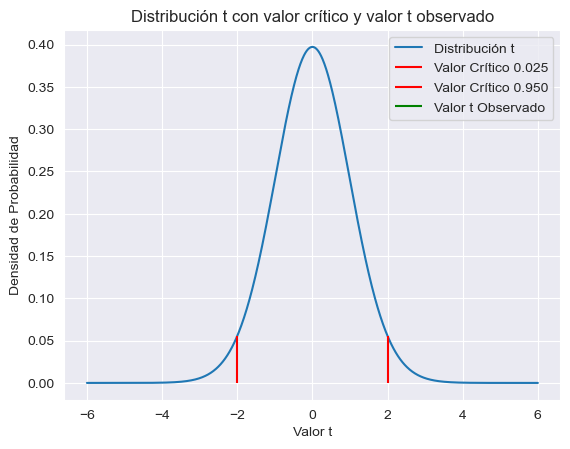

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t  # Se importa 't' para la distribución t-Student

# Definir el rango de valores de t
t_values = np.linspace(-6, 6, 1000)

# Calcular la distribución t
t_distribucion = t.pdf(t_values, grados_libertad)

# Graficar la distribución t
plt.plot(t_values, t_distribucion, label='Distribución t')

# Graficar el valor crítico y el valor t observado
plt.vlines(lim_inf, 0, t.pdf(lim_inf, grados_libertad), colors='r', label='Valor Crítico 0.025')
plt.vlines(lim_sup, 0, t.pdf(lim_sup, grados_libertad), colors='r', label='Valor Crítico 0.950')

# Cambio en el nombre de la variable 't' que contiene el valor crítico de T
plt.vlines(valor_critico_t, 0, t.pdf(valor_critico_t, grados_libertad), colors='g', label='Valor t Observado')

# Configurar la leyenda y etiquetas
plt.legend()
plt.xlabel('Valor t')
plt.ylabel('Densidad de Probabilidad')
plt.title('Distribución t con valor crítico y valor t observado')

plt.show()

<span style="color:blue;">

**RESULTADOS**

- No se aprecia el "Valor t Observado" en el gráfico ya que la línea es muy corta y Python no la dibuja (valor -3.8693)
- Como se puede apreciar en la gráfica, **el valor T crítico se encuentra en la zona de rechazo de la H0** por lo que podemos establecer que existe una diferencia significativa entre las medias de ambas poblaciones. Estas diferencias además no se deben a un factor de aleatoriedad, sino que estadísticamente podemos decir que ambas muestras son diferentes. 
- El valor t observado se encuentra a la izquierda, por lo tanto podemos afirmar que **el cráneo de la muestra del periodo tardío es más ancho que el cráneo del periodo temprano**

</span>
